In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,8)

import warnings
warnings.filterwarnings('ignore')

import pandas as pd

from sklearn.preprocessing import LabelEncoder  

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.model_selection import train_test_split


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics

In [3]:
df = pd.read_csv('/Users/davidfernandez/Desktop/Projects/Machine learning project/Kaggle_competition/Data/preprocessed.csv')


In [4]:
df

,id,carat,cut,color,clarity,depth,table,x,y,z,price,cut_encoded,color_encoded,clarity_encoded
0,0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353,1,5,0
1,1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183,4,6,5
2,2,0.72,Ideal,F,VS2,61.8,59.0,5.71,5.74,3.54,7.983,4,4,3
3,3,1.08,Very Good,G,SI2,63.2,57.0,6.54,6.50,4.12,8.371,3,3,0
4,4,0.36,Premium,G,VS1,62.3,59.0,4.50,4.55,2.82,6.588,1,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40433,40450,0.42,Premium,D,SI2,62.1,59.0,4.78,4.82,2.98,6.551,1,5,0
40434,40451,0.53,Premium,G,VS2,62.0,58.0,5.21,5.18,3.22,7.382,1,3,3
40435,40452,0.80,Good,G,SI2,62.8,58.0,5.86,5.90,3.69,7.768,2,3,0
40436,40453,1.01,Very Good,F,VS2,61.5,57.0,6.40,6.48,3.96,8.726,3,4,3


## Model adjustment

In [6]:
X = df.drop(['price', 'cut', 'color', 'clarity'], axis =1)

y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size   = 0.8, random_state = 42)


### Decision tree

In [25]:
regressor = DecisionTreeRegressor(random_state = 0) 
  
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

CPU times: user 3 µs, sys: 9 µs, total: 12 µs
Wall time: 50.3 µs


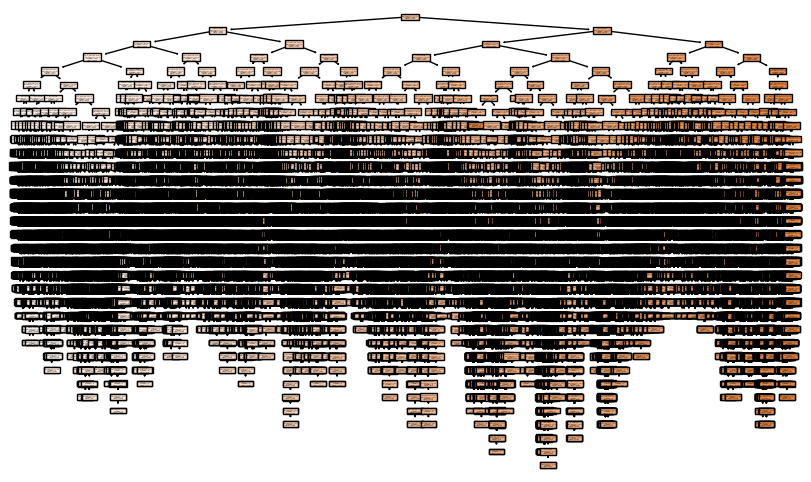

In [26]:
%time
fig = plt.figure(figsize=(10, 6))
tree.plot_tree(regressor, feature_names=X_train.columns, filled=True)
plt.show();


In [27]:
# max features

max_features = np.sqrt(len(X_train.columns))
max_features

3.1622776601683795

In [28]:
# max depth

print(regressor.tree_.max_depth)

33


In [29]:
y_pred_test_dt = regressor.predict(X_test)
y_pred_train_dt = regressor.predict(X_train)

In [30]:
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    
    
    resultados = {'MAE': [metrics.mean_absolute_error(y_test, y_test_pred), metrics.mean_absolute_error(y_train, y_train_pred)],
                'MSE': [metrics.mean_squared_error(y_test, y_test_pred), metrics.mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)), np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))],
                'R2':  [metrics.r2_score(y_test, y_test_pred), metrics.r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df
    

In [31]:
dt_results1 = metricas(y_test, y_train, y_pred_test_dt, y_pred_train_dt, "Decission Tree I")
dt_results1

,MAE,MSE,RMSE,R2,set,modelo
0,8.840356e-02,1.606634e-02,1.267531e-01,0.984527,test,Decission Tree I
1,2.026200e-17,2.736018e-32,1.654091e-16,1.000000,train,Decission Tree I


In [32]:
param = {"max_depth": [4, 5, 6, 7],
        "min_samples_split": [10, 50, 100],
        "max_features": [1,2,3,4,5,6]}

gs = GridSearchCV(
            estimator=DecisionTreeRegressor(),
            param_grid= param,
            cv=10,
            verbose=3,
            return_train_score = True,
            scoring="neg_mean_squared_error")

In [33]:
%time
gs.fit(X_train, y_train)

CPU times: user 4 µs, sys: 11 µs, total: 15 µs
Wall time: 65.1 µs
Fitting 10 folds for each of 72 candidates, totalling 720 fits
[CV 1/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.523, test=-0.527) total time=   0.0s
[CV 2/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.828, test=-0.840) total time=   0.0s
[CV 3/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.500, test=-0.508) total time=   0.0s
[CV 4/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-1.012, test=-1.011) total time=   0.0s
[CV 5/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.164, test=-0.175) total time=   0.0s
[CV 6/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.215, test=-0.207) total time=   0.0s
[CV 7/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.125, test=-0.129) total time=   0.0s
[CV 8/10] END max_depth=4, max_feature

[CV 1/10] END max_depth=4, max_features=3, min_samples_split=100;, score=(train=-0.059, test=-0.059) total time=   0.0s
[CV 2/10] END max_depth=4, max_features=3, min_samples_split=100;, score=(train=-0.055, test=-0.059) total time=   0.0s
[CV 3/10] END max_depth=4, max_features=3, min_samples_split=100;, score=(train=-0.068, test=-0.068) total time=   0.0s
[CV 4/10] END max_depth=4, max_features=3, min_samples_split=100;, score=(train=-0.063, test=-0.059) total time=   0.0s
[CV 5/10] END max_depth=4, max_features=3, min_samples_split=100;, score=(train=-0.062, test=-0.065) total time=   0.0s
[CV 6/10] END max_depth=4, max_features=3, min_samples_split=100;, score=(train=-0.062, test=-0.063) total time=   0.0s
[CV 7/10] END max_depth=4, max_features=3, min_samples_split=100;, score=(train=-0.067, test=-0.071) total time=   0.0s
[CV 8/10] END max_depth=4, max_features=3, min_samples_split=100;, score=(train=-0.121, test=-0.118) total time=   0.0s
[CV 9/10] END max_depth=4, max_features=

[CV 7/10] END max_depth=4, max_features=6, min_samples_split=10;, score=(train=-0.054, test=-0.057) total time=   0.0s
[CV 8/10] END max_depth=4, max_features=6, min_samples_split=10;, score=(train=-0.054, test=-0.055) total time=   0.0s
[CV 9/10] END max_depth=4, max_features=6, min_samples_split=10;, score=(train=-0.053, test=-0.054) total time=   0.0s
[CV 10/10] END max_depth=4, max_features=6, min_samples_split=10;, score=(train=-0.060, test=-0.060) total time=   0.0s
[CV 1/10] END max_depth=4, max_features=6, min_samples_split=50;, score=(train=-0.059, test=-0.061) total time=   0.0s
[CV 2/10] END max_depth=4, max_features=6, min_samples_split=50;, score=(train=-0.061, test=-0.063) total time=   0.0s
[CV 3/10] END max_depth=4, max_features=6, min_samples_split=50;, score=(train=-0.056, test=-0.056) total time=   0.0s
[CV 4/10] END max_depth=4, max_features=6, min_samples_split=50;, score=(train=-0.054, test=-0.053) total time=   0.0s
[CV 5/10] END max_depth=4, max_features=6, min_

[CV 7/10] END max_depth=5, max_features=2, min_samples_split=100;, score=(train=-0.052, test=-0.054) total time=   0.0s
[CV 8/10] END max_depth=5, max_features=2, min_samples_split=100;, score=(train=-0.055, test=-0.055) total time=   0.0s
[CV 9/10] END max_depth=5, max_features=2, min_samples_split=100;, score=(train=-0.070, test=-0.068) total time=   0.0s
[CV 10/10] END max_depth=5, max_features=2, min_samples_split=100;, score=(train=-0.065, test=-0.067) total time=   0.0s
[CV 1/10] END max_depth=5, max_features=3, min_samples_split=10;, score=(train=-0.158, test=-0.161) total time=   0.0s
[CV 2/10] END max_depth=5, max_features=3, min_samples_split=10;, score=(train=-0.050, test=-0.052) total time=   0.0s
[CV 3/10] END max_depth=5, max_features=3, min_samples_split=10;, score=(train=-0.060, test=-0.061) total time=   0.0s
[CV 4/10] END max_depth=5, max_features=3, min_samples_split=10;, score=(train=-0.051, test=-0.052) total time=   0.0s
[CV 5/10] END max_depth=5, max_features=3, 

[CV 10/10] END max_depth=5, max_features=5, min_samples_split=10;, score=(train=-0.042, test=-0.045) total time=   0.0s
[CV 1/10] END max_depth=5, max_features=5, min_samples_split=50;, score=(train=-0.042, test=-0.044) total time=   0.0s
[CV 2/10] END max_depth=5, max_features=5, min_samples_split=50;, score=(train=-0.043, test=-0.045) total time=   0.0s
[CV 3/10] END max_depth=5, max_features=5, min_samples_split=50;, score=(train=-0.044, test=-0.044) total time=   0.0s
[CV 4/10] END max_depth=5, max_features=5, min_samples_split=50;, score=(train=-0.045, test=-0.044) total time=   0.0s
[CV 5/10] END max_depth=5, max_features=5, min_samples_split=50;, score=(train=-0.040, test=-0.042) total time=   0.0s
[CV 6/10] END max_depth=5, max_features=5, min_samples_split=50;, score=(train=-0.042, test=-0.043) total time=   0.0s
[CV 7/10] END max_depth=5, max_features=5, min_samples_split=50;, score=(train=-0.046, test=-0.047) total time=   0.0s
[CV 8/10] END max_depth=5, max_features=5, min_

[CV 10/10] END max_depth=6, max_features=1, min_samples_split=100;, score=(train=-0.148, test=-0.150) total time=   0.0s
[CV 1/10] END max_depth=6, max_features=2, min_samples_split=10;, score=(train=-0.051, test=-0.054) total time=   0.0s
[CV 2/10] END max_depth=6, max_features=2, min_samples_split=10;, score=(train=-0.059, test=-0.062) total time=   0.0s
[CV 3/10] END max_depth=6, max_features=2, min_samples_split=10;, score=(train=-0.043, test=-0.043) total time=   0.0s
[CV 4/10] END max_depth=6, max_features=2, min_samples_split=10;, score=(train=-0.052, test=-0.050) total time=   0.0s
[CV 5/10] END max_depth=6, max_features=2, min_samples_split=10;, score=(train=-0.043, test=-0.045) total time=   0.0s
[CV 6/10] END max_depth=6, max_features=2, min_samples_split=10;, score=(train=-0.122, test=-0.118) total time=   0.0s
[CV 7/10] END max_depth=6, max_features=2, min_samples_split=10;, score=(train=-0.057, test=-0.059) total time=   0.0s
[CV 8/10] END max_depth=6, max_features=2, min

[CV 6/10] END max_depth=6, max_features=4, min_samples_split=50;, score=(train=-0.038, test=-0.039) total time=   0.0s
[CV 7/10] END max_depth=6, max_features=4, min_samples_split=50;, score=(train=-0.038, test=-0.041) total time=   0.0s
[CV 8/10] END max_depth=6, max_features=4, min_samples_split=50;, score=(train=-0.043, test=-0.042) total time=   0.0s
[CV 9/10] END max_depth=6, max_features=4, min_samples_split=50;, score=(train=-0.039, test=-0.038) total time=   0.0s
[CV 10/10] END max_depth=6, max_features=4, min_samples_split=50;, score=(train=-0.042, test=-0.046) total time=   0.0s
[CV 1/10] END max_depth=6, max_features=4, min_samples_split=100;, score=(train=-0.038, test=-0.040) total time=   0.0s
[CV 2/10] END max_depth=6, max_features=4, min_samples_split=100;, score=(train=-0.037, test=-0.040) total time=   0.0s
[CV 3/10] END max_depth=6, max_features=4, min_samples_split=100;, score=(train=-0.036, test=-0.037) total time=   0.0s
[CV 4/10] END max_depth=6, max_features=4, m

[CV 5/10] END max_depth=6, max_features=6, min_samples_split=100;, score=(train=-0.033, test=-0.035) total time=   0.0s
[CV 6/10] END max_depth=6, max_features=6, min_samples_split=100;, score=(train=-0.033, test=-0.034) total time=   0.0s
[CV 7/10] END max_depth=6, max_features=6, min_samples_split=100;, score=(train=-0.034, test=-0.036) total time=   0.0s
[CV 8/10] END max_depth=6, max_features=6, min_samples_split=100;, score=(train=-0.032, test=-0.034) total time=   0.0s
[CV 9/10] END max_depth=6, max_features=6, min_samples_split=100;, score=(train=-0.040, test=-0.040) total time=   0.0s
[CV 10/10] END max_depth=6, max_features=6, min_samples_split=100;, score=(train=-0.033, test=-0.034) total time=   0.0s
[CV 1/10] END max_depth=7, max_features=1, min_samples_split=10;, score=(train=-0.090, test=-0.097) total time=   0.0s
[CV 2/10] END max_depth=7, max_features=1, min_samples_split=10;, score=(train=-0.122, test=-0.129) total time=   0.0s
[CV 3/10] END max_depth=7, max_features=1

[CV 10/10] END max_depth=7, max_features=3, min_samples_split=10;, score=(train=-0.031, test=-0.035) total time=   0.0s
[CV 1/10] END max_depth=7, max_features=3, min_samples_split=50;, score=(train=-0.031, test=-0.033) total time=   0.0s
[CV 2/10] END max_depth=7, max_features=3, min_samples_split=50;, score=(train=-0.035, test=-0.036) total time=   0.0s
[CV 3/10] END max_depth=7, max_features=3, min_samples_split=50;, score=(train=-0.035, test=-0.038) total time=   0.0s
[CV 4/10] END max_depth=7, max_features=3, min_samples_split=50;, score=(train=-0.048, test=-0.047) total time=   0.0s
[CV 5/10] END max_depth=7, max_features=3, min_samples_split=50;, score=(train=-0.040, test=-0.041) total time=   0.0s
[CV 6/10] END max_depth=7, max_features=3, min_samples_split=50;, score=(train=-0.034, test=-0.038) total time=   0.0s
[CV 7/10] END max_depth=7, max_features=3, min_samples_split=50;, score=(train=-0.031, test=-0.034) total time=   0.0s
[CV 8/10] END max_depth=7, max_features=3, min_

[CV 9/10] END max_depth=7, max_features=5, min_samples_split=50;, score=(train=-0.026, test=-0.028) total time=   0.0s
[CV 10/10] END max_depth=7, max_features=5, min_samples_split=50;, score=(train=-0.038, test=-0.042) total time=   0.0s
[CV 1/10] END max_depth=7, max_features=5, min_samples_split=100;, score=(train=-0.030, test=-0.032) total time=   0.0s
[CV 2/10] END max_depth=7, max_features=5, min_samples_split=100;, score=(train=-0.025, test=-0.027) total time=   0.0s
[CV 3/10] END max_depth=7, max_features=5, min_samples_split=100;, score=(train=-0.030, test=-0.030) total time=   0.0s
[CV 4/10] END max_depth=7, max_features=5, min_samples_split=100;, score=(train=-0.025, test=-0.026) total time=   0.0s
[CV 5/10] END max_depth=7, max_features=5, min_samples_split=100;, score=(train=-0.029, test=-0.031) total time=   0.0s
[CV 6/10] END max_depth=7, max_features=5, min_samples_split=100;, score=(train=-0.029, test=-0.029) total time=   0.0s
[CV 7/10] END max_depth=7, max_features=5

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [4, 5, 6, 7],
                         'max_features': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=3)

In [34]:

best_tree = gs.best_estimator_
best_tree


DecisionTreeRegressor(max_depth=7, max_features=6, min_samples_split=50)

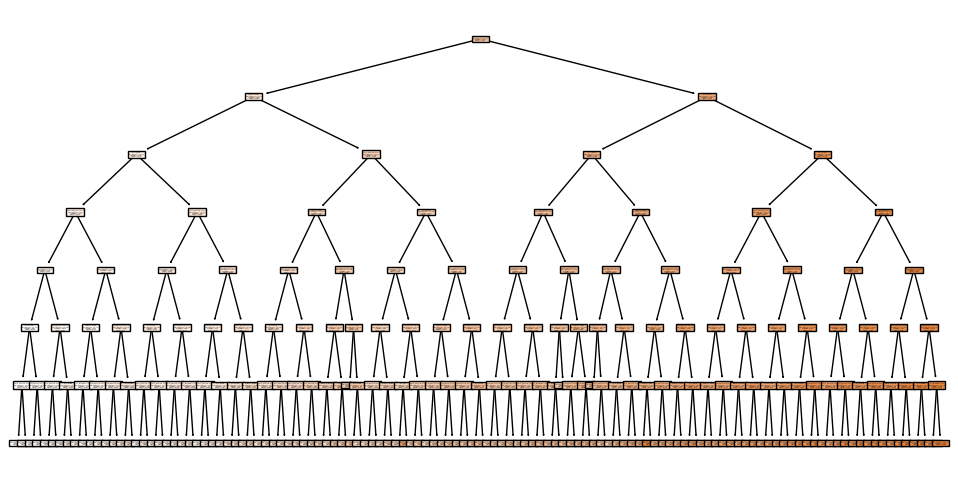

In [35]:
fig = plt.figure(figsize=(12, 6))
tree.plot_tree(best_tree, feature_names=X_train.columns, filled=True);


In [36]:
fig.savefig("decision_tree.png", facecolor="white")

In [37]:
print(tree.export_text(best_tree, feature_names= list(X_train.columns)))

|--- y <= 5.64
|   |--- carat <= 0.45
|   |   |--- x <= 4.61
|   |   |   |--- clarity_encoded <= 5.50
|   |   |   |   |--- z <= 2.59
|   |   |   |   |   |--- x <= 4.10
|   |   |   |   |   |   |--- clarity_encoded <= 4.50
|   |   |   |   |   |   |   |--- value: [6.06]
|   |   |   |   |   |   |--- clarity_encoded >  4.50
|   |   |   |   |   |   |   |--- value: [6.28]
|   |   |   |   |   |--- x >  4.10
|   |   |   |   |   |   |--- color_encoded <= 3.50
|   |   |   |   |   |   |   |--- value: [6.20]
|   |   |   |   |   |   |--- color_encoded >  3.50
|   |   |   |   |   |   |   |--- value: [6.38]
|   |   |   |   |--- z >  2.59
|   |   |   |   |   |--- color_encoded <= 2.50
|   |   |   |   |   |   |--- clarity_encoded <= 3.50
|   |   |   |   |   |   |   |--- value: [6.22]
|   |   |   |   |   |   |--- clarity_encoded >  3.50
|   |   |   |   |   |   |   |--- value: [6.39]
|   |   |   |   |   |--- color_encoded >  2.50
|   |   |   |   |   |   |--- x <= 4.36
|   |   |   |   |   |   |   |--- valu

## Prediction

In [38]:
y_pred_test_dt2 = best_tree.predict(X_test)
y_pred_train_dt2 = best_tree.predict(X_train)

In [39]:
dt_results2 = metricas(y_test, y_train, y_pred_test_dt2, y_pred_train_dt2, "Decision tree II")

In [40]:
dt_results2

,MAE,MSE,RMSE,R2,set,modelo
0,0.127694,0.027814,0.166776,0.973213,test,Decision tree II
1,0.126102,0.026938,0.164127,0.973907,train,Decision tree II


## Test

In [50]:
df1 = pd.read_csv("/Users/davidfernandez/Desktop/Projects/Machine learning project/Kaggle_competition/Data/reality.csv", index_col = 0)


In [51]:
df1

,id,carat,cut,color,clarity,depth,table,x,y,z,cut_encoded,color_encoded,clarity_encoded
0,0,0.32,Ideal,I,SI1,60.5,58.0,4.43,4.49,2.70,4,1,2
1,1,1.24,Premium,I,SI1,62.9,60.0,6.80,6.74,4.26,1,1,2
2,2,1.66,Premium,D,SI1,62.0,59.0,7.55,7.60,4.70,1,5,2
3,3,0.75,Premium,D,SI2,60.6,56.0,5.94,5.90,3.59,1,5,0
4,4,1.50,Fair,E,SI2,64.8,55.0,7.26,7.15,4.67,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13480,13480,1.10,Premium,G,SI1,59.6,60.0,6.74,6.70,4.00,1,3,2
13481,13481,0.90,Very Good,D,SI1,62.1,60.0,6.14,6.20,3.83,3,5,2
13482,13482,0.30,Ideal,F,VS2,62.1,53.3,4.30,4.32,2.68,4,4,3
13483,13483,1.25,Ideal,I,SI1,59.6,59.0,7.01,7.09,4.20,4,1,2


In [52]:
X_reality = df1.drop(['cut', 'color', 'clarity'], axis=1)


In [53]:
X_reality_submision = best_tree.predict(X_reality)
X_reality_submision

array([6.21596486, 8.43648235, 9.52320648, ..., 6.47136087, 8.61133333,
       7.8651363 ])

In [56]:
submision1 = pd.DataFrame(X_reality_submision)
submision1.reset_index(inplace=True)
submision1.rename(columns={"index":"id",0:"price"}, inplace =True)
submision1

,id,price
0,0,6.215965
1,1,8.436482
2,2,9.523206
3,3,7.744552
4,4,8.618059
...,...,...
13477,13477,8.555215
13478,13478,8.362110
13479,13479,6.471361
13480,13480,8.611333


In [57]:
submision1.to_csv("submission_david1.csv", index=False)

In [59]:
DFF = pd.read_csv("/Users/davidfernandez/Desktop/submission_david1.csv", index_col = 0)


DFF

,price
id,
0,6.215965
1,8.436482
2,9.523206
3,7.744552
4,8.618059
...,...
13477,8.555215
13478,8.362110
13479,6.471361
